In [8]:
import algos
import bandit
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
import utils

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

DS_NAME = None #None for synthesize, or {"LastFM"}
N_SWITCHES = 750 # LastFM: 1892
N_BANDITS = 3 # LastFM: 17632
OPT_SIZE = 2
HORIZON = 60 # LastFM: 10*17632
max_n_expert = len(list(combinations(np.arange(N_BANDITS),OPT_SIZE)))
N_EXPERT = None #All possible combinations
# N_EXPERT = 10
if N_EXPERT is not None:
    print(f'N_EXPERT = {N_EXPERT}')
    assert N_EXPERT<=max_n_expert, f"The number of expert ({N_EXPERT}) must be smaller than the maximum combination ({max_n_expert})"
assert N_BANDITS<=HORIZON, f"The number of arm ({N_BANDITS}) must be smaller than the horizon ({HORIZON})"
N_EXPS = 5 #Repeat experiments
kwargs = {'switches_cache_step': 10,
          'gap_constrain':0.1}

#MetaAlg params
N_UNBIASED_OBS = 1
ALG_NAME = 'ExpertMOSS'

In [17]:
env = bandit.Bernoulli(n_bandits=N_BANDITS, n_tasks=N_SWITCHES+1)
agent_moss = algos.MOSS(n_bandits=N_BANDITS, horizon=HORIZON)
agent_PE = algos.PhaseElim(n_bandits=N_BANDITS, horizon=HORIZON)
env.reset_task(0)
r, _ = utils.rolls_out(agent_PE, env, HORIZON, quiet=True)

In [18]:
r

16.92159167427254

In [19]:
agent_PE.cur_mu

array([-1.00000000e+03, -1.00000000e+03,  3.58974359e-01])

In [20]:
env.p_dist[0]

array([0.71830305, 0.00200469, 0.93202653])

In [6]:
env = bandit.Bernoulli(n_bandits=N_BANDITS, n_tasks=N_SWITCHES+1)
horizon_list = range(N_BANDITS, N_BANDITS*100, 1)
r_moss = np.zeros((N_EXPS, len(horizon_list)))
r_PE = np.zeros((N_EXPS, len(horizon_list)))
for i in range(N_EXPS):
    for j,h in enumerate(horizon_list):
        agent_moss = algos.MOSS(n_bandits=N_BANDITS, horizon=h)
        agent_PE = algos.PhaseElim(n_bandits=N_BANDITS, horizon=h)
        r_moss[i,j] = utils.rolls_out(agent_moss, env, HORIZON, quiet=True)[0]/h
        r_PE[i,j] = utils.rolls_out(agent_PE, env, HORIZON, quiet=True)[0]/h

Text(0.5, 1.0, 'Horizon experiment: 3 arms')

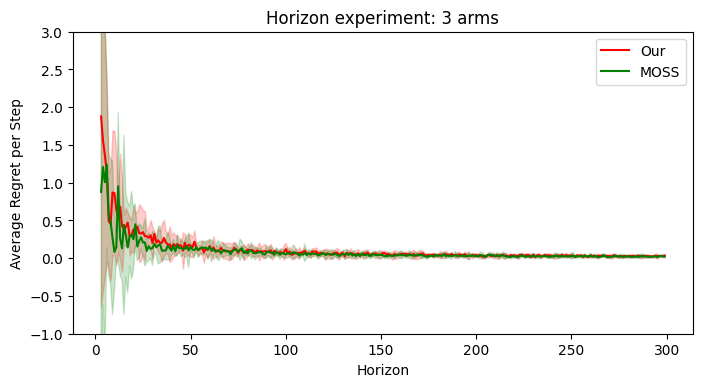

In [7]:
X = horizon_list
xlabel, ylabel = 'Horizon', 'Average Regret per Step'
title = f'Horizon experiment: {N_BANDITS} arms'
meta_Y = np.mean(r_PE, axis=0)
meta_dY = 2*np.sqrt(np.var(r_PE, axis=0))
moss_Y = np.mean(r_moss, axis=0)
moss_dY = 2*np.sqrt(np.var(r_moss, axis=0))
plt.plot(X, meta_Y, '-', color='red', label = "Our")
plt.fill_between(X, meta_Y - meta_dY, meta_Y + meta_dY, color='red', alpha=0.2)

plt.plot(X, moss_Y, '-', color='green', label = "MOSS")
plt.fill_between(X, moss_Y - moss_dY, moss_Y + moss_dY, color='green', alpha=0.2)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.yscale('log')
plt.ylim([-1, 3])
plt.legend()
plt.title(title)